# 07_A_Histogramm_PG-PointCloud_Noise

In diesem Jupyter Notebook, werden Visualisierungen aus den Daten der Punktwolkenvergleiche aus CloudCompare getestet. 

- Visualisierung in Form von Hisogrammen der Abweichungen von PG-Punktwolke zur Referenzpunktwolke
- Beurteilung der Streuung und der Störpunke in den PG-Punktwolken

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und/oder bearbeitet.*


In [1]:
import pandas as pd
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt

### 1. Vergleich Cloud2Cloud: TLS (24.03.2025) - DJI Phantom 4 Pro V2 (24.03.2025)

In [2]:
pc1_path = r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\07_Check_PG-PointCloud_Completeness\70_BaseData\PointCloud\20250324_RTC360-DJIPhantom4ProV2_Kirsche_C2C-distance.las"

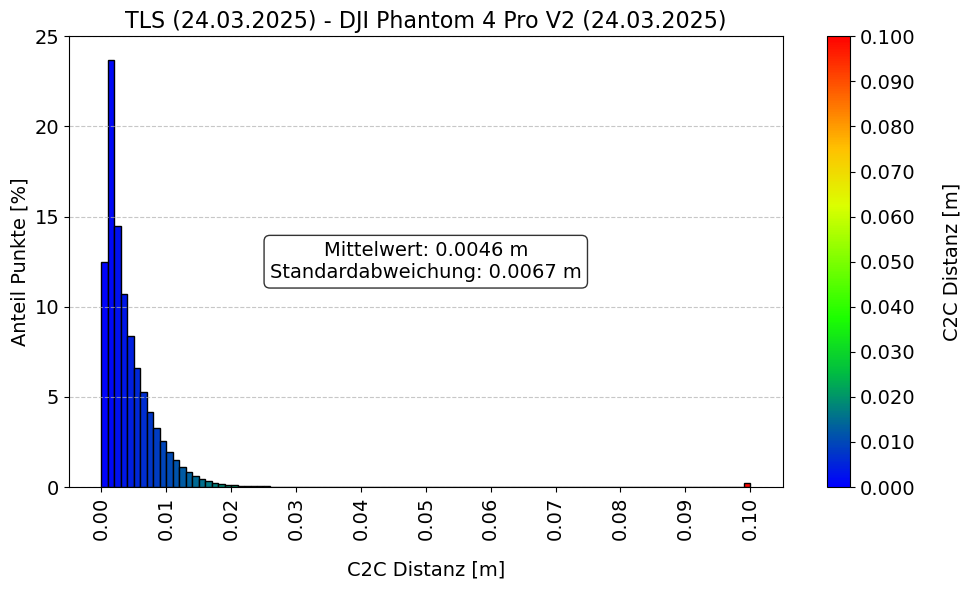

In [16]:
# === LAS-Datei laden ===
las = laspy.read(pc1_path)

# === Attribut prüfen ===
if "C2C__absolute__distances[<0.1]" in las.point_format.extra_dimension_names:
    c2c_distances = las["C2C__absolute__distances[<0.1]"]
else:
    raise KeyError("Attribut 'C2C__absolute__distances[<0.1]' nicht in der LAS-Datei gefunden!")

# === Statistik berechnen ===
mean_val = np.mean(c2c_distances)
std_val = np.std(c2c_distances)

# === Histogrammdaten berechnen ===
counts, bin_edges = np.histogram(c2c_distances, bins=100)
percentages = counts / counts.sum() * 100
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

cc_cmap = colors.LinearSegmentedColormap.from_list(
    'cloudcompare', [
        (0.000, '#0000FF'),   # 0.000 m
        (0.125, '#005BA3'),   # 0.0125 m
        (0.250, '#00BB43'),   # 0.025 m
        (0.375, '#1CFF00'),   # 0.0375 m
        (0.500, '#7CFF00'),   # 0.050 m
        (0.625, '#DBFF00'),   # 0.0625 m
        (0.750, '#FFC200'),   # 0.075 m
        (0.875, '#FF6200'),   # 0.0875 m
        (1.000, '#FF0200')    # 0.100 m
    ]
)

# === Normierung auf 0–0.1 m
norm = colors.Normalize(vmin=0, vmax=0.1)
sm = cm.ScalarMappable(cmap=cc_cmap, norm=norm)
bar_colors = cc_cmap(norm(bin_centers))

# === Plot ===
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_edges[:-1], percentages, width=np.diff(bin_edges),
               color=bar_colors, edgecolor='black', align='edge')

# === X-Achse in 1-cm Schritten beschriften ===
x_ticks = np.arange(0, 0.11, 0.01)
plt.xticks(x_ticks, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 25)

# === Achsenbeschriftungen und Titel ===
plt.xlabel("C2C Distanz [m]", fontsize=14, labelpad=15)
plt.ylabel("Anteil Punkte [%]", fontsize=14)
plt.title("TLS (24.03.2025) - DJI Phantom 4 Pro V2 (24.03.2025)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Mittelwert und Standardabweichung in Plot schreiben (zentriert) ===
text_str = f"Mittelwert: {mean_val:.4f} m\nStandardabweichung: {std_val:.4f} m"
plt.gca().text(0.5, 0.5, text_str, transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='center', horizontalalignment='center',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# === Farbleiste (Colorbar) mit gleichen Ticks wie X-Achse ===
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=x_ticks, orientation='vertical')
cbar.ax.set_yticklabels([f"{x:.3f}" for x in x_ticks], fontsize=14)
cbar.set_label('C2C Distanz [m]', fontsize=14, labelpad=20, rotation=90, loc='center')

# === Layout anpassen ===
plt.tight_layout()
plt.show()

### 2. Vergleich Cloud2Cloud TLS (19.03.2025) - DJI Mini 3 Pro (19.03.2025)

In [3]:
pc2_path = r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\07_Check_PG-PointCloud_Completeness\70_BaseData\PointCloud\20250319_RTC360-DJIMini3Pro_Kirsche_C2C-distance.las"

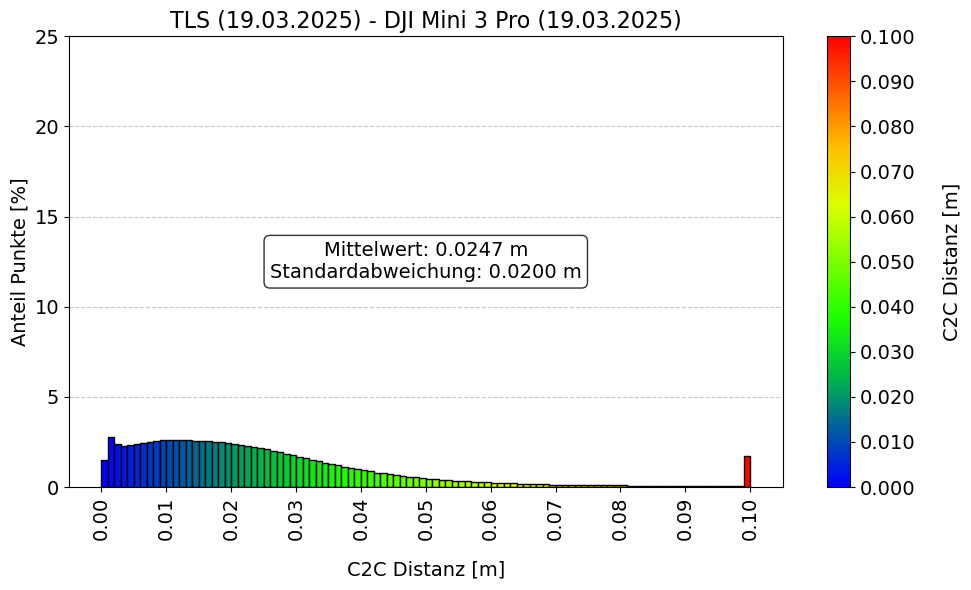

In [17]:
# === LAS-Datei laden ===
las = laspy.read(pc2_path)

# === Attribut prüfen ===
if "C2C__absolute__distances[<0.1]" in las.point_format.extra_dimension_names:
    c2c_distances = las["C2C__absolute__distances[<0.1]"]
else:
    raise KeyError("Attribut 'C2C__absolute__distances[<0.1]' nicht in der LAS-Datei gefunden!")

# === Statistik berechnen ===
mean_val = np.mean(c2c_distances)
std_val = np.std(c2c_distances)

# === Histogrammdaten berechnen ===
counts, bin_edges = np.histogram(c2c_distances, bins=100)
percentages = counts / counts.sum() * 100
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# === CloudCompare-Farbverlauf definieren ===
cc_cmap = colors.LinearSegmentedColormap.from_list(
    'cloudcompare', [
        (0.000, '#0000FF'),   # 0.000 m
        (0.125, '#005BA3'),   # 0.0125 m
        (0.250, '#00BB43'),   # 0.025 m
        (0.375, '#1CFF00'),   # 0.0375 m
        (0.500, '#7CFF00'),   # 0.050 m
        (0.625, '#DBFF00'),   # 0.0625 m
        (0.750, '#FFC200'),   # 0.075 m
        (0.875, '#FF6200'),   # 0.0875 m
        (1.000, '#FF0200')    # 0.100 m
    ]
)

# === Normierung auf 0–0.1 m
norm = colors.Normalize(vmin=0, vmax=0.1)
sm = cm.ScalarMappable(cmap=cc_cmap, norm=norm)
bar_colors = cc_cmap(norm(bin_centers))

# === Plot ===
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_edges[:-1], percentages, width=np.diff(bin_edges),
               color=bar_colors, edgecolor='black', align='edge')

# === X-Achse in 1-cm Schritten beschriften ===
x_ticks = np.arange(0, 0.11, 0.01)
plt.xticks(x_ticks, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 25)

# === Achsenbeschriftungen und Titel ===
plt.xlabel("C2C Distanz [m]", fontsize=14, labelpad=15)
plt.ylabel("Anteil Punkte [%]", fontsize=14)
plt.title("TLS (19.03.2025) - DJI Mini 3 Pro (19.03.2025)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Mittelwert und Standardabweichung in Plot schreiben (zentriert) ===
text_str = f"Mittelwert: {mean_val:.4f} m\nStandardabweichung: {std_val:.4f} m"
plt.gca().text(0.5, 0.5, text_str, transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='center', horizontalalignment='center',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# === Farbleiste (Colorbar) mit gleichen Ticks wie X-Achse ===
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=x_ticks, orientation='vertical')
cbar.ax.set_yticklabels([f"{x:.3f}" for x in x_ticks], fontsize=14)
cbar.set_label('C2C Distanz [m]', fontsize=14, labelpad=20, rotation=90, loc='center')

# === Layout anpassen ===
plt.tight_layout()
plt.show()

### 3. Vergleich Cloud2Cloud TLS (24.03.2025) - DJI Mini 3 Pro (26.03.2025)

In [7]:
pc3_path = r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\07_Check_PG-PointCloud_Completeness\70_BaseData\PointCloud\20250326_RTC360-DJIMini3Pro_Kirsche_C2C-distance.las"

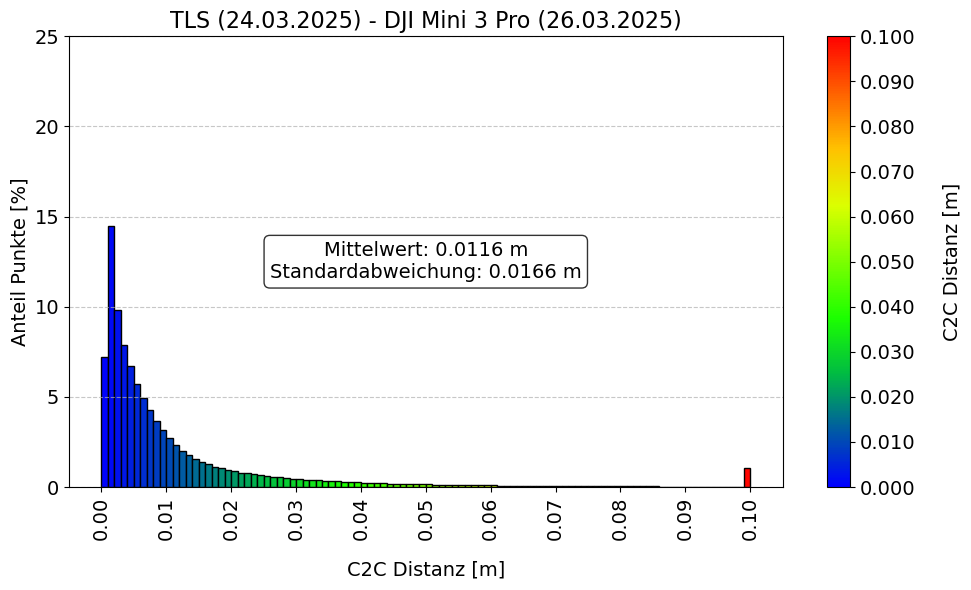

In [18]:
# === LAS-Datei laden ===
las = laspy.read(pc3_path)

# === Attribut prüfen ===
if "C2C__absolute__distances[<0.1]" in las.point_format.extra_dimension_names:
    c2c_distances = las["C2C__absolute__distances[<0.1]"]
else:
    raise KeyError("Attribut 'C2C__absolute__distances[<0.1]' nicht in der LAS-Datei gefunden!")

# === Statistik berechnen ===
mean_val = np.mean(c2c_distances)
std_val = np.std(c2c_distances)

# === Histogrammdaten berechnen ===
counts, bin_edges = np.histogram(c2c_distances, bins=100)
percentages = counts / counts.sum() * 100
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# === CloudCompare-Farbverlauf definieren ===
cc_cmap = colors.LinearSegmentedColormap.from_list(
    'cloudcompare', [
        (0.000, '#0000FF'),   # 0.000 m
        (0.125, '#005BA3'),   # 0.0125 m
        (0.250, '#00BB43'),   # 0.025 m
        (0.375, '#1CFF00'),   # 0.0375 m
        (0.500, '#7CFF00'),   # 0.050 m
        (0.625, '#DBFF00'),   # 0.0625 m
        (0.750, '#FFC200'),   # 0.075 m
        (0.875, '#FF6200'),   # 0.0875 m
        (1.000, '#FF0200')    # 0.100 m
    ]
)

# === Normierung auf 0–0.1 m
norm = colors.Normalize(vmin=0, vmax=0.1)
sm = cm.ScalarMappable(cmap=cc_cmap, norm=norm)
bar_colors = cc_cmap(norm(bin_centers))

# === Plot ===
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_edges[:-1], percentages, width=np.diff(bin_edges),
               color=bar_colors, edgecolor='black', align='edge')

# === X-Achse in 1-cm Schritten beschriften ===
x_ticks = np.arange(0, 0.11, 0.01)
plt.xticks(x_ticks, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 25)

# === Achsenbeschriftungen und Titel ===
plt.xlabel("C2C Distanz [m]", fontsize=14, labelpad=15)
plt.ylabel("Anteil Punkte [%]", fontsize=14)
plt.title("TLS (24.03.2025) - DJI Mini 3 Pro (26.03.2025)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Mittelwert und Standardabweichung in Plot schreiben (zentriert) ===
text_str = f"Mittelwert: {mean_val:.4f} m\nStandardabweichung: {std_val:.4f} m"
plt.gca().text(0.5, 0.5, text_str, transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='center', horizontalalignment='center',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# === Farbleiste (Colorbar) mit gleichen Ticks wie X-Achse ===
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=x_ticks, orientation='vertical')
cbar.ax.set_yticklabels([f"{x:.3f}" for x in x_ticks], fontsize=14)
cbar.set_label('C2C Distanz [m]', fontsize=14, labelpad=20, rotation=90, loc='center')

# === Layout anpassen ===
plt.tight_layout()
plt.show()